In [1]:
import pandas as pd
import numpy as np
input_data = pd.read_csv("20191122210552.csv",encoding = 'cp949').iloc[:,:-5]

In [2]:
display(input_data)

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C)
0,101,2010-01-01,-10.3,-17.7,811,-5.0,1543,1.67,NaN,NaN,...,-20.8,-3.5,-2.2,-0.5,1.6,2.5,7.3,10.8,15.8,17.4
1,101,2010-01-02,-6.1,-12.6,2333,-0.6,1505,13.33,NaN,NaN,...,-18.9,-1.7,-1.1,-0.3,1.4,2.3,7.2,10.7,15.6,17.4
2,101,2010-01-03,-10.5,-17.8,652,-3.6,1510,NaN,NaN,NaN,...,-23.5,-2.0,-1.1,-0.4,1.4,1.9,7.0,10.5,15.4,17.4
3,101,2010-01-04,-6.9,-11.3,459,-3.3,1633,9.92,NaN,NaN,...,-17.0,-1.8,-1.0,-0.3,1.3,2.0,6.8,10.4,15.3,17.4
4,101,2010-01-05,-10.2,-16.7,2334,-4.9,2,NaN,NaN,NaN,...,-26.3,-2.7,-1.5,-0.4,1.3,1.9,6.8,10.4,15.4,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,101,2019-06-26,24.5,19.4,527,28.8,1542,NaN,0.0,NaN,...,16.6,26.1,26.1,25.9,25.6,24.1,20.5,18.2,15.2,14.6
3464,101,2019-06-27,26.9,21.7,534,32.9,1510,NaN,0.0,NaN,...,20.6,27.7,27.4,26.4,25.9,24.2,20.7,18.2,15.3,14.6
3465,101,2019-06-28,26.6,22.9,502,30.3,1651,NaN,0.1,NaN,...,19.9,27.9,27.8,27.2,26.7,24.7,20.8,18.3,15.3,14.6
3466,101,2019-06-29,22.9,19.6,725,27.7,1603,NaN,0.1,NaN,...,18.1,26.6,26.6,26.4,26.3,25.1,21.0,18.4,15.4,14.6


# 비어있는 값 채우기
보통의 경우 0을 채우지만 해당 데이터는 0을 None으로 만들었기 때문에 0으로 치환

비어있는 값이 많지 않은 칼럼의 경우에는 기상데이터의 특성상 1년전 또는 후의 데이터 삽입 넣어줌

In [3]:
append_0_columns = ['강수 계속시간(hr)',
                    '10분 최다 강수량(mm)' ,
                    '10분 최다강수량 시각(hhmi)',
                    '1시간 최다강수량(mm)', 
                    '1시간 최다 강수량 시각(hhmi)', 
                    '일강수량(mm)', 
                    '일 최심신적설(cm)', 
                    '일 최심신적설 시각(hhmi)', 
                    '일 최심적설(cm)',
                    '일 최심적설 시각(hhmi)', 
                    '합계 3시간 신적설(cm)',
                   '평균 전운량(1/10)',
                   '평균 중하층운량(1/10)']
print(input_data.columns)
input_data[append_0_columns].isnull()

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)',

,강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10)
0,False,True,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,True,True,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,False,False,True,False,False
3,False,True,True,True,True,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,True,False,True,False,True,False,True,True,True,True,True,True,True
3464,True,False,True,False,True,False,True,True,True,True,True,True,True
3465,True,False,True,False,True,False,True,True,True,True,True,True,True
3466,True,False,True,False,True,False,True,True,True,True,True,True,True


In [4]:
for column in append_0_columns:
    input_data[column] = input_data[column].fillna(0)

In [5]:
display(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 56 columns):
지점                     3468 non-null int64
일시                     3468 non-null object
평균기온(°C)               3468 non-null float64
최저기온(°C)               3468 non-null float64
최저기온 시각(hhmi)          3468 non-null int64
최고기온(°C)               3468 non-null float64
최고기온 시각(hhmi)          3468 non-null int64
강수 계속시간(hr)            3468 non-null float64
10분 최다 강수량(mm)         3468 non-null float64
10분 최다강수량 시각(hhmi)     3468 non-null float64
1시간 최다강수량(mm)          3468 non-null float64
1시간 최다 강수량 시각(hhmi)    3468 non-null float64
일강수량(mm)               3468 non-null float64
최대 순간 풍속(m/s)          3468 non-null float64
최대 순간 풍속 풍향(16방위)      3468 non-null int64
최대 순간풍속 시각(hhmi)       3468 non-null int64
최대 풍속(m/s)             3468 non-null float64
최대 풍속 풍향(16방위)         3468 non-null int64
최대 풍속 시각(hhmi)         3468 non-null int64
평균 풍속(m/s)             3468 non-null float64
풍정합(100m

None

### 시간 데이터의 경우 카테고리 분류시 값이 너무 많아질 수 있어 int형으로 변환

# 내용이 중첩되는 칼럼(특징) 제거

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\venv\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing 

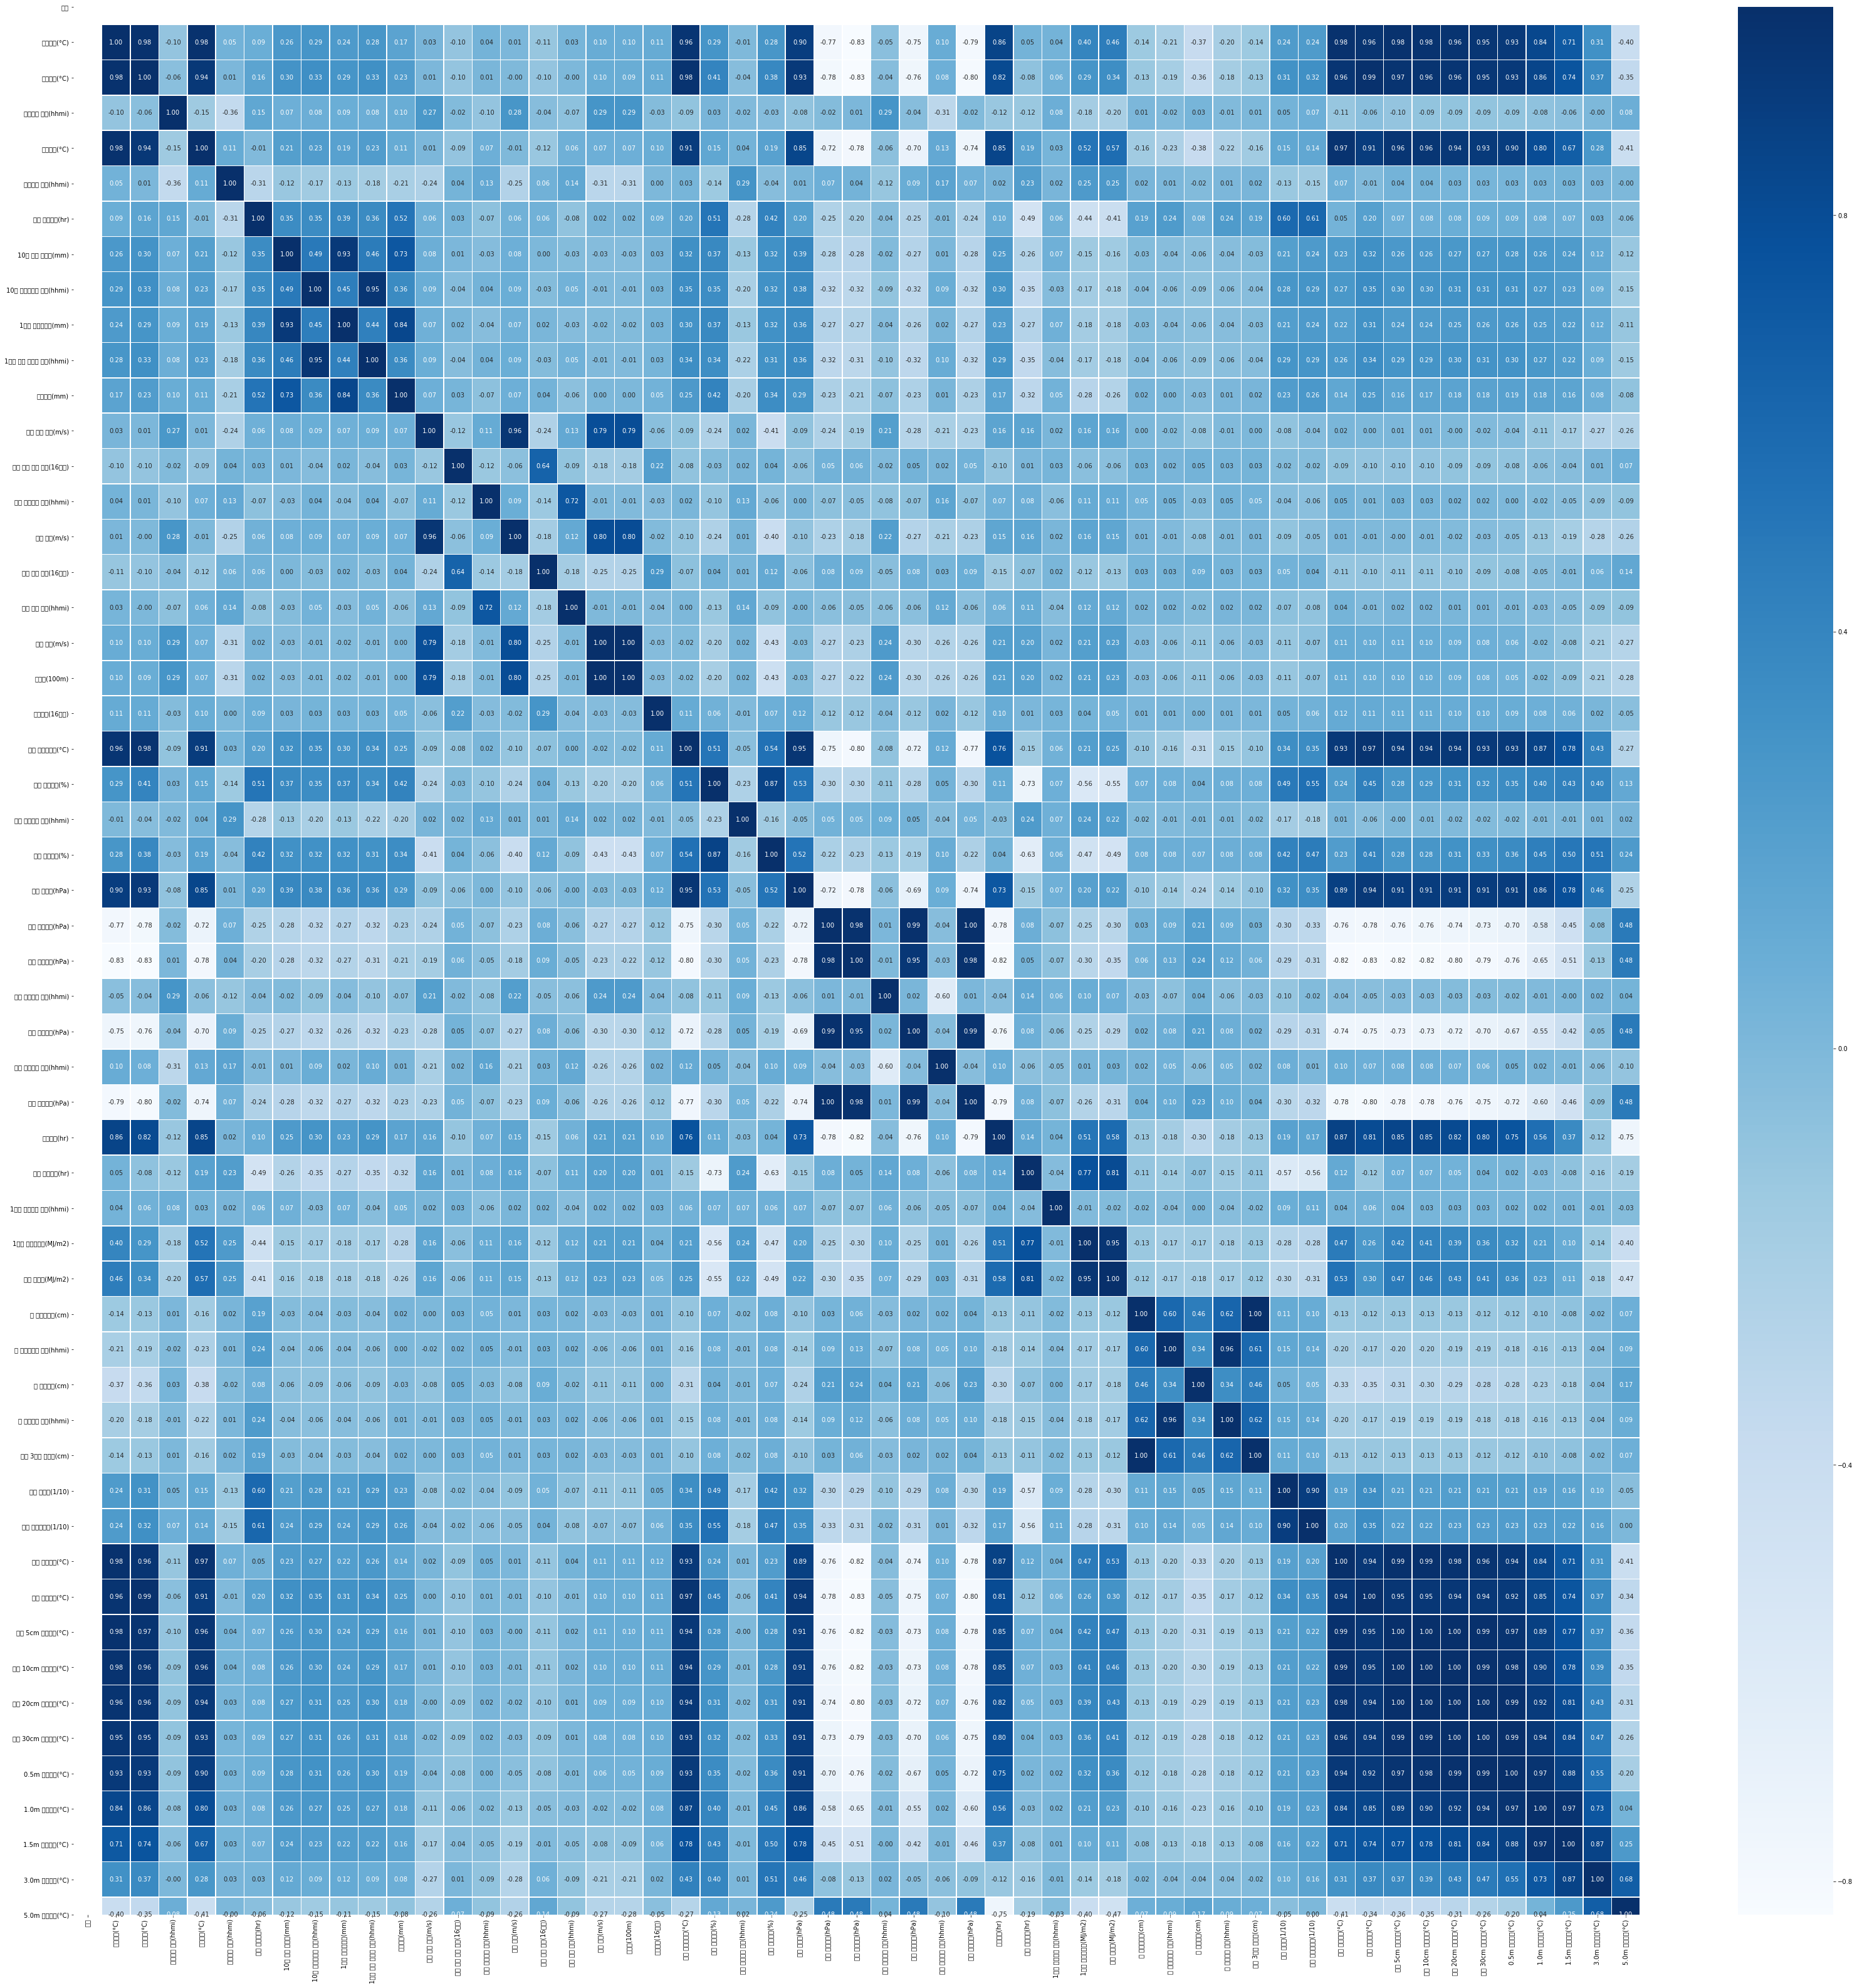

In [7]:
plt.figure(figsize=(56,56))
sns.heatmap(data = input_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 시각화 분석 결과(상관관계가 0.9이상인 데이터 삭제)
시각화 결과 온도와 관련된 대부분의 Feature가 상관관계가 매우 높아 비슷한 정보를 가지고 있음을 알수 있다. <br> 평균 기온을 제외한 나머지 정보는 제거한다. <br> 또한 평균 증기압 역시 상관관계가 매우 높아 제거한다. <br> 평균 풍속과 풍정합, 최대 순간 풍속 특징은 매우 비슷함 <br> 일사량 간 상관관계가 매우 높음

In [8]:
input_data = input_data.loc[:,['지점', '일시', '평균기온(°C)',  '최저기온 시각(hhmi)', 
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '일강수량(mm)',  
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '평균 풍속(m/s)', '최다풍향(16방위)',
        '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
        '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)',  '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)',
        '평균 전운량(1/10)']]

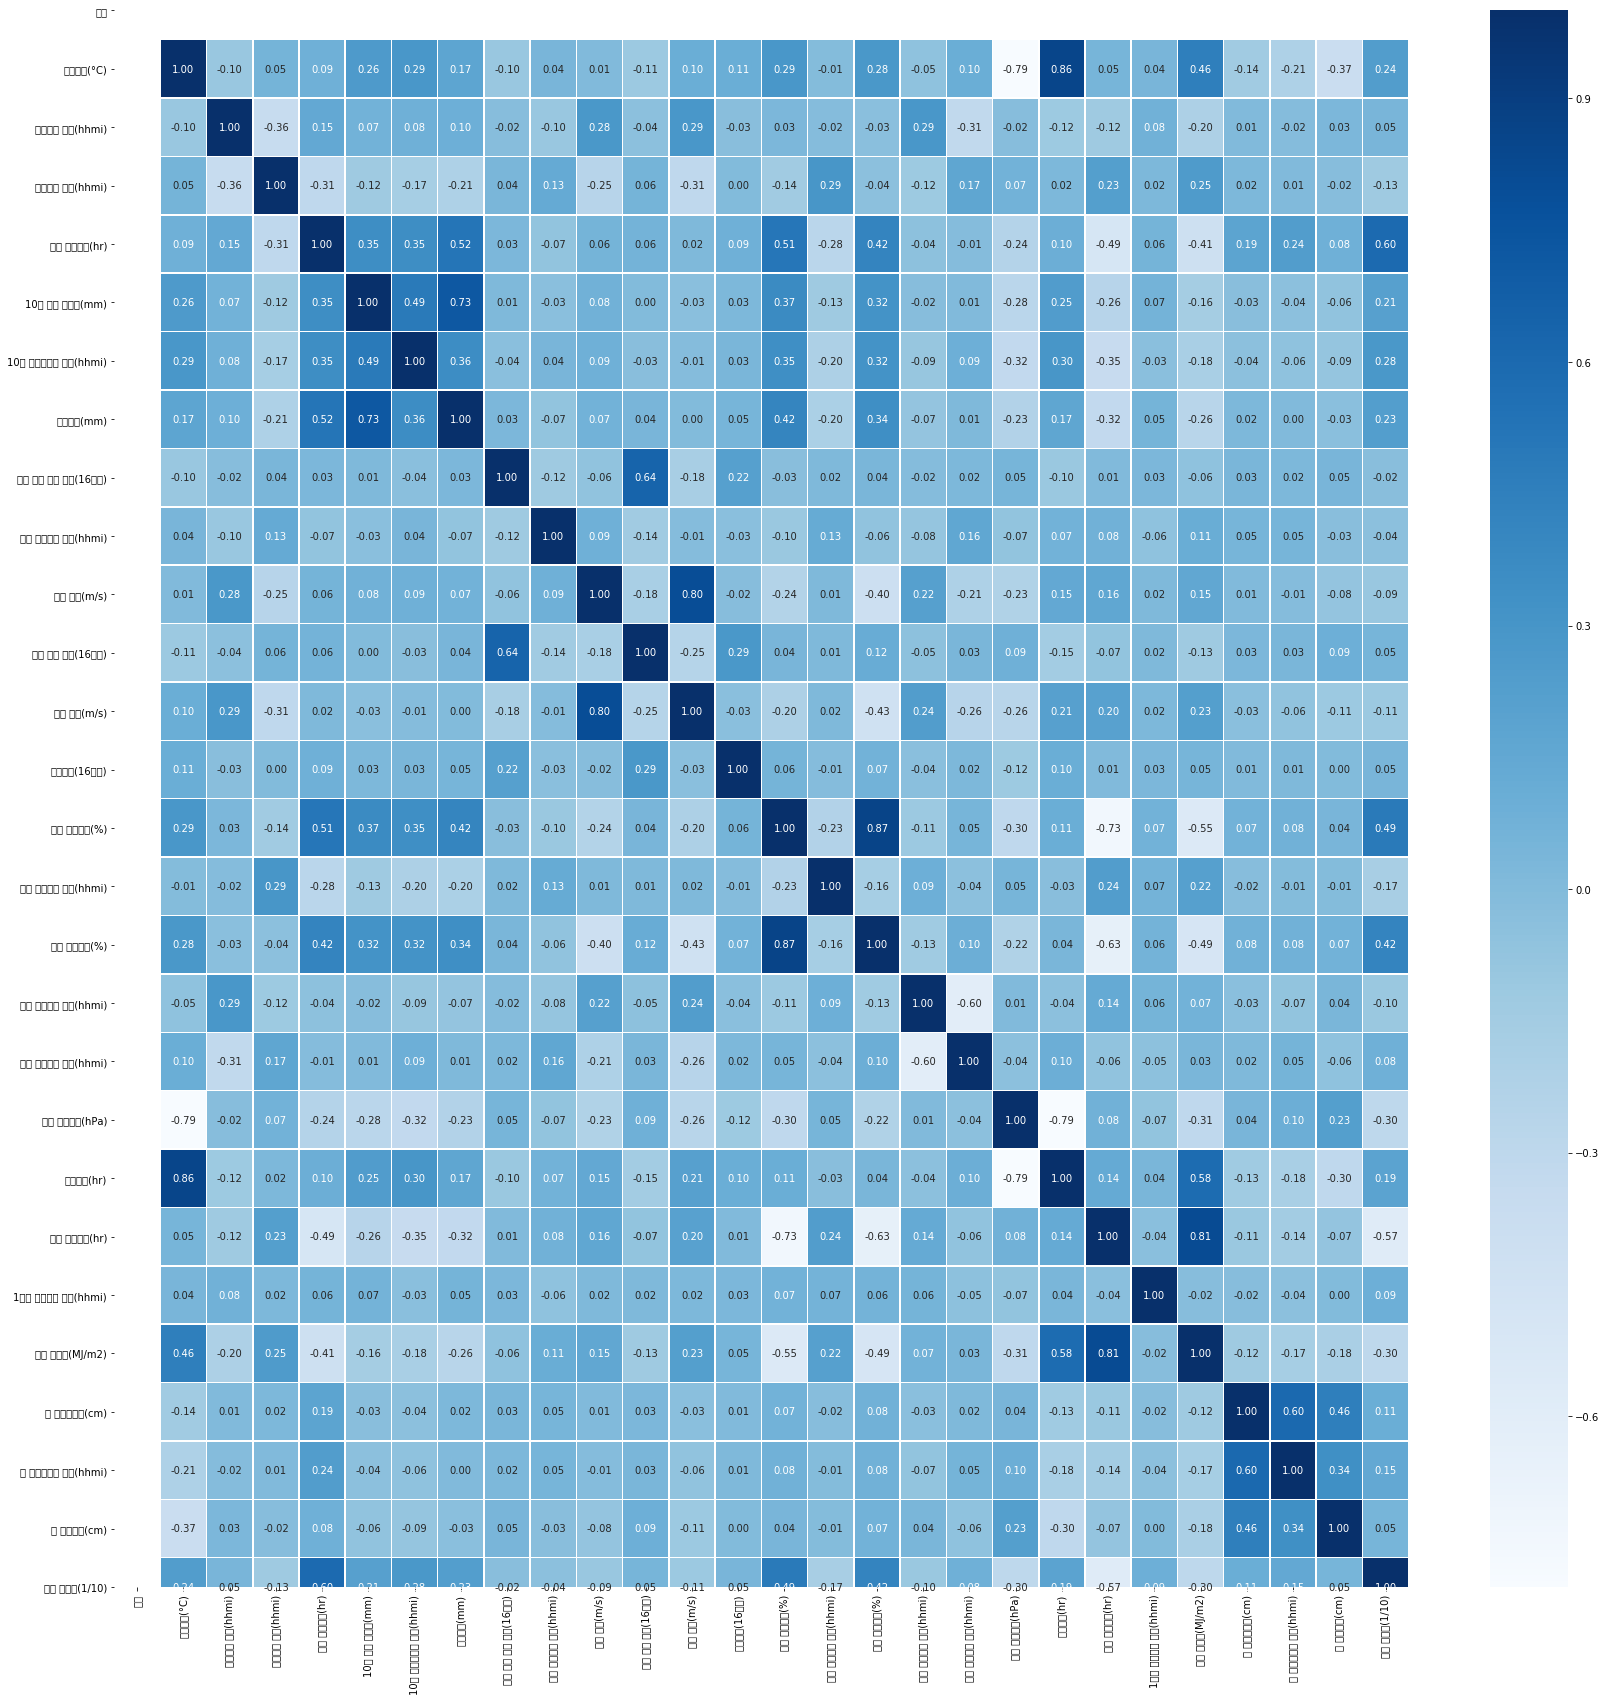

In [9]:
plt.figure(figsize=(29,29))
sns.heatmap(data = input_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

여전히 특징이 많기 때문에 특징을 더욱 제거한다.

In [10]:
year_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
label = pd.concat([pd.read_excel("2010미세먼지.xlsx"),
                   pd.read_excel("2011미세먼지.xlsx"),
                   pd.read_excel("2012미세먼지.xlsx"),
                   pd.read_excel("2013미세먼지.xlsx"),
                   pd.read_excel("2014미세먼지.xlsx"),
                   pd.read_excel("2015미세먼지.xlsx"),
                   pd.read_excel("2016미세먼지.xlsx"),
                   pd.read_excel("2017미세먼지.xlsx"),
                   pd.read_excel("2018미세먼지.xlsx"),
                   pd.read_excel("2019미세먼지.xlsx")])


c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [11]:
import os
fix_dir_list = os.listdir("미세먼지 참조(석사)/")
fix_data = pd.concat(
    [pd.read_excel("./미세먼지 참조(석사)/" + fix_dir_list[0]),
    pd.read_excel("./미세먼지 참조(석사)/" + fix_dir_list[1]),
    pd.read_excel("미세먼지 참조(석사)/" + fix_dir_list[2]),
    pd.read_excel("미세먼지 참조(석사)/" + fix_dir_list[3])]
                    )
fix_data["측정일시"].astype('str')
fix_day = fix_data["측정일시"].astype('str').to_list()

In [12]:
to_fix_data = label["측정일시"].to_list()
fix_index = []
for i in range(len(to_fix_data)):
    if str(to_fix_data[i]) in fix_day:
        fix_index.append(i)

In [13]:
to_fix_pm10 = label["PM10"].to_list()
seoksa_pm10 = fix_data["PM10"].to_list()
cnt = 0
for i in fix_index:
    to_fix_pm10[i] = seoksa_pm10[cnt]
    cnt += 1

In [14]:
label["PM10"] = to_fix_pm10

In [15]:
display(label.shape[0]/24)

3112.0

In [16]:
pm10_list = []
day_list = []
step_pm10 = 0
cnt = 0
label["측정일시"].astype('str')
for i,pm10 in label.iterrows():
    if i % 24 == 0:
        cnt = 0
        step_pm10 = 0
    if pm10["PM10"] != np.nan and pm10["PM10"] > 0:
        cnt += 1
        step_pm10+=pm10['PM10']
    if i % 24 == 23:
        if cnt == 0:
            continue
        pm10["측정일시"] = str(pm10["측정일시"])
        pm10_list.append([pm10["측정일시"][:4] +'-' + pm10["측정일시"][4:6] +'-' + pm10["측정일시"][6:8],step_pm10/cnt])

In [17]:
input_data["label"] = 0

In [18]:
len(pm10_list),len(input_data)

(3074, 3468)

In [19]:
li = []
for i in pm10_list:
    li.append(i[0])
j =0
pm_10_list = np.array(pm10_list)
label_list = []
for i,d in input_data.iterrows():
    if d["일시"] in li:
        label_list.append(pm10_list[li.index(d["일시"])][1])
    if d["일시"] not in li:
        label_list.append(np.nan)

In [20]:
print(len(label_list))
input_data["label"] = label_list

3468


In [21]:
display(input_data[input_data["label"] == input_data["label"].max()])

,지점,일시,평균기온(°C),최저기온 시각(hhmi),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),일강수량(mm),최대 순간 풍속 풍향(16방위),...,평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),1시간 최다일사 시각(hhmi),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),평균 전운량(1/10),label
1879,101,2015-02-23,1.4,735,1541,0.0,0.0,0.0,0.0,230,...,1020.0,11.1,7.3,1300,12.17,0.0,0.0,0.0,3.3,575.958333


In [22]:
display(input_data.corr()["label"])

지점                         NaN
평균기온(°C)             -0.342752
최저기온 시각(hhmi)        -0.075069
최고기온 시각(hhmi)         0.118062
강수 계속시간(hr)          -0.207644
10분 최다 강수량(mm)       -0.196359
10분 최다강수량 시각(hhmi)   -0.190679
일강수량(mm)             -0.197844
최대 순간 풍속 풍향(16방위)     0.101033
최대 순간풍속 시각(hhmi)      0.051425
최대 풍속(m/s)           -0.050284
최대 풍속 풍향(16방위)        0.098409
평균 풍속(m/s)           -0.154353
최다풍향(16방위)           -0.019473
최소 상대습도(%)           -0.226545
최소 상대습도 시각(hhmi)      0.069964
평균 상대습도(%)           -0.197313
최고 해면기압 시각(hhmi)     -0.048660
최저 해면기압 시각(hhmi)      0.080950
평균 해면기압(hPa)          0.262401
가조시간(hr)             -0.266155
합계 일조시간(hr)           0.049115
1시간 최다일사 시각(hhmi)    -0.005215
합계 일사량(MJ/m2)        -0.073494
일 최심신적설(cm)          -0.012224
일 최심신적설 시각(hhmi)      0.027391
일 최심적설(cm)            0.055684
평균 전운량(1/10)         -0.102774
label                 1.000000
Name: label, dtype: float64

### input_data에서 지점과 일시의 모두 같으므로 불필요

In [23]:
input_data = input_data.drop(["지점","일시"],axis = 1)


In [25]:
column_name = input_data.columns
display(input_data)

,평균기온(°C),최저기온 시각(hhmi),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),일강수량(mm),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),1시간 최다일사 시각(hhmi),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),평균 전운량(1/10),label
0,-10.3,811,1543,1.67,0.0,0.0,0.1,20,1422,1.8,...,1022.5,9.6,5.1,1100,7.87,0.1,2400.0,1.3,4.1,36.000000
1,-6.1,2333,1505,13.33,0.0,0.0,7.1,320,932,2.6,...,1017.4,9.6,1.8,1400,3.14,7.8,1300.0,9.0,8.0,41.041667
2,-10.5,652,1510,0.00,0.0,0.0,0.0,360,1519,1.5,...,1022.0,9.6,6.6,1300,9.21,0.0,0.0,8.2,5.0,50.916667
3,-6.9,459,1633,9.92,0.0,0.0,13.7,200,2356,3.5,...,1013.8,9.6,0.0,1300,2.90,23.0,1700.0,30.0,9.0,33.416667
4,-10.2,2334,2,0.00,0.0,0.0,0.0,230,7,3.6,...,1021.8,9.7,7.1,1300,9.55,0.0,0.0,29.3,1.8,47.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,24.5,527,1542,0.00,0.0,0.0,0.0,320,310,2.6,...,1008.8,14.8,2.9,900,12.84,0.0,0.0,0.0,0.0,39.541667
3464,26.9,534,1510,0.00,0.0,0.0,0.0,340,1526,2.7,...,1000.3,14.8,5.1,1200,18.62,0.0,0.0,0.0,0.0,23.791667
3465,26.6,502,1651,0.00,0.1,0.0,0.1,180,1824,3.1,...,1001.2,14.8,5.6,1100,15.90,0.0,0.0,0.0,0.0,36.166667
3466,22.9,725,1603,0.00,0.1,0.0,0.2,110,408,2.4,...,998.4,14.8,3.4,1400,11.88,0.0,0.0,0.0,0.0,29.250000


c:\python\venv\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


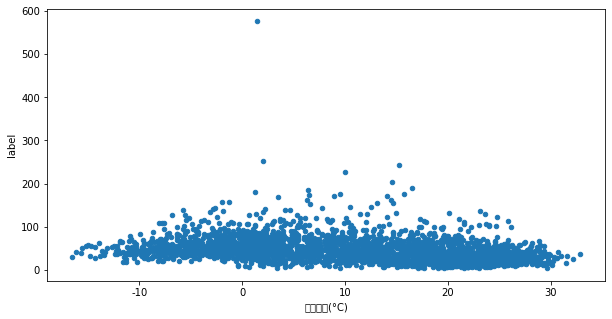

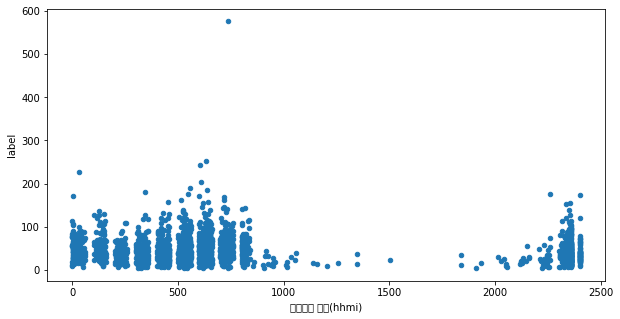

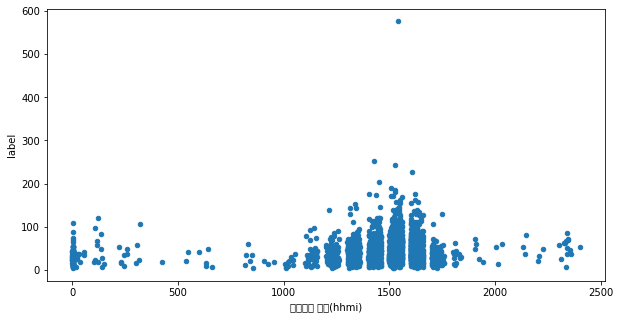

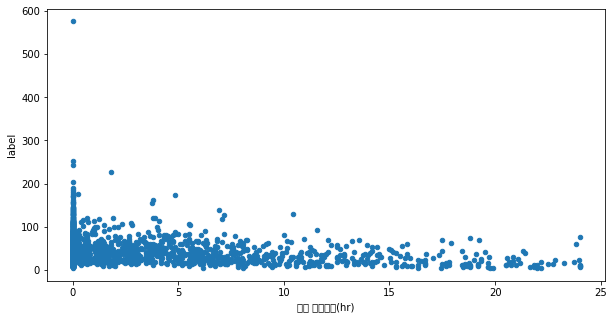

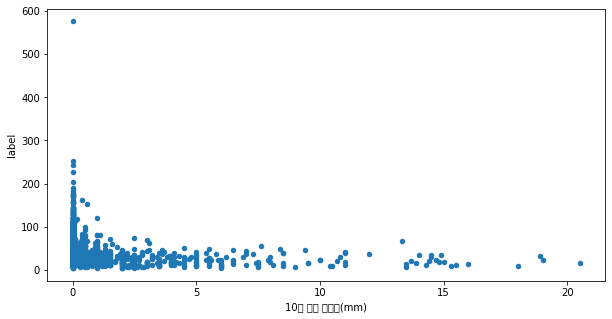

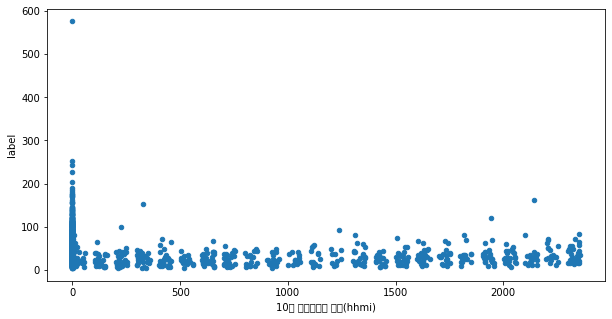

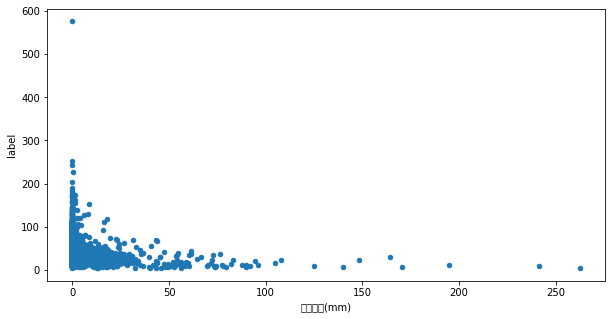

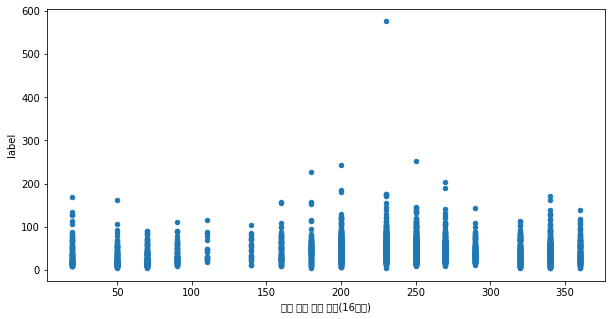

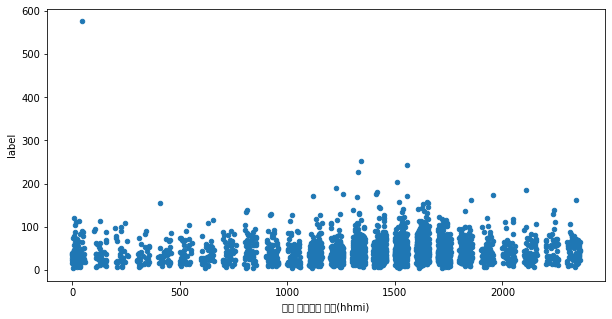

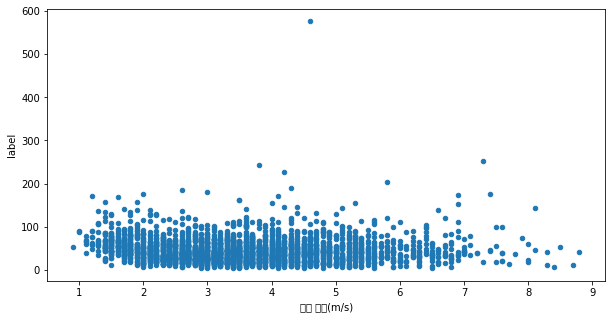

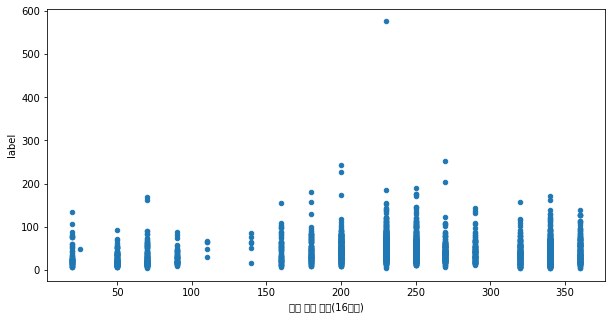

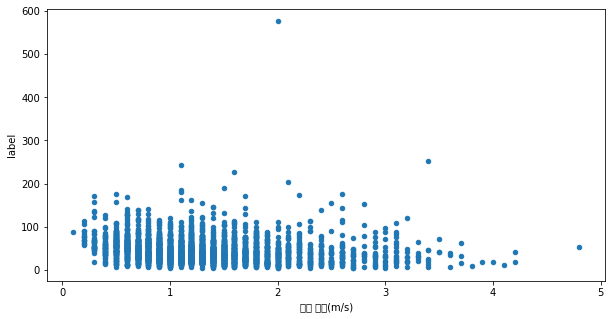

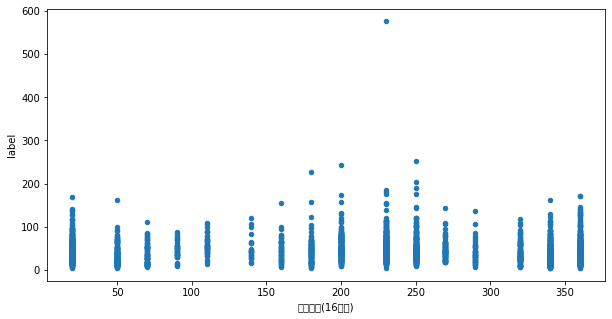

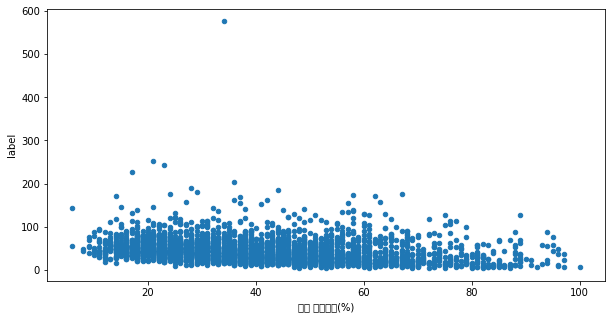

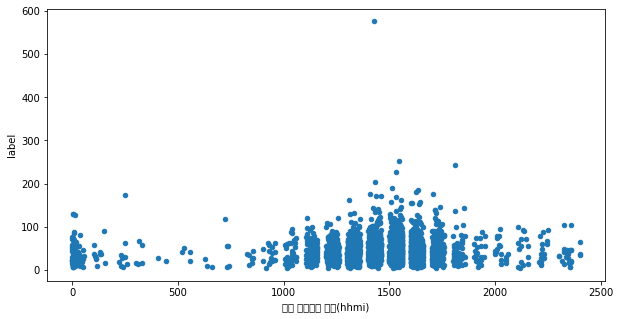

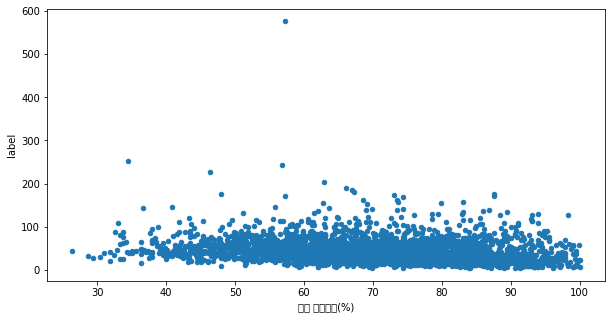

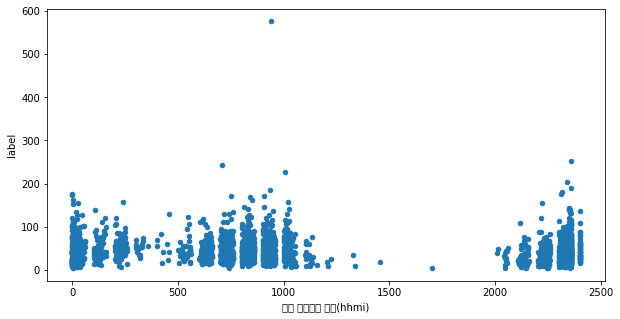

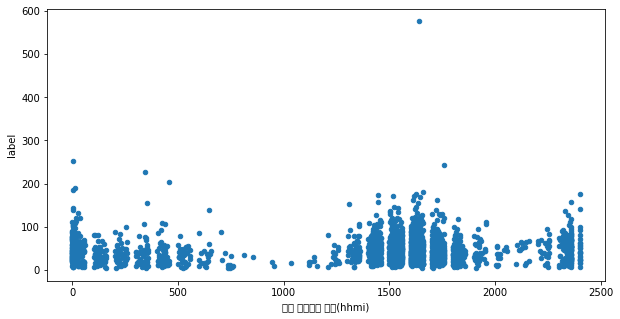

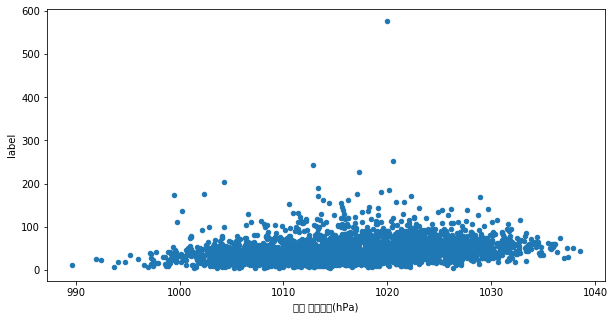

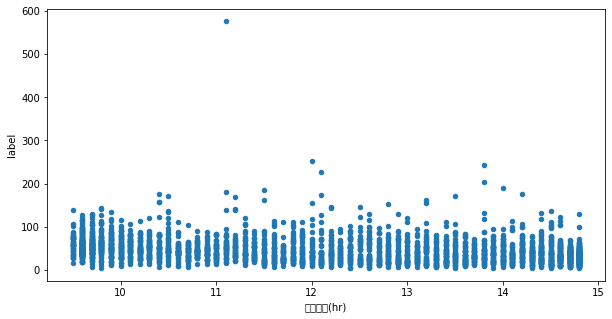

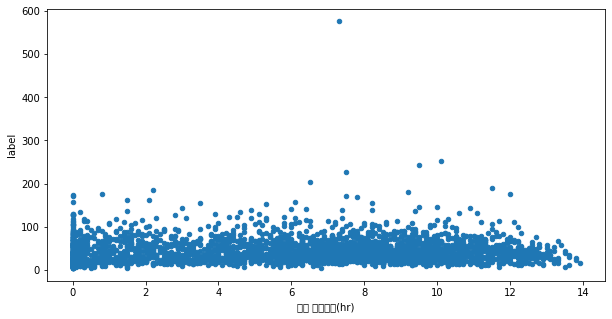

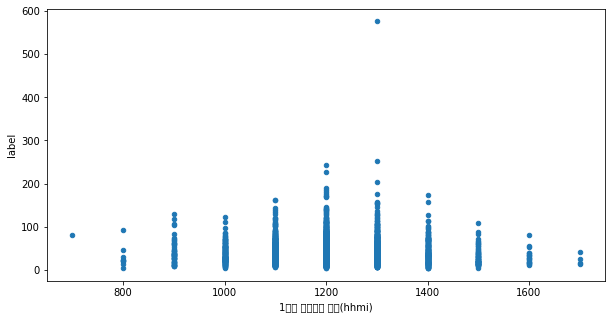

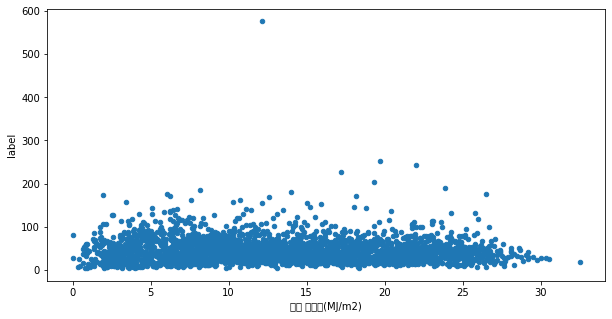

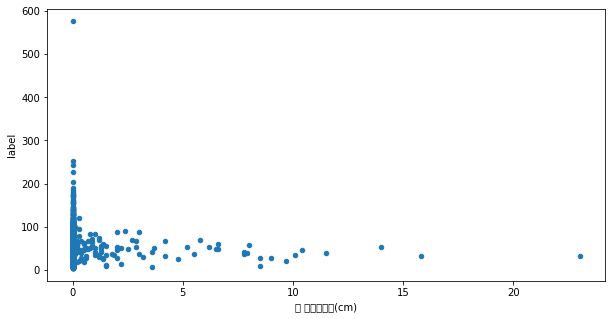

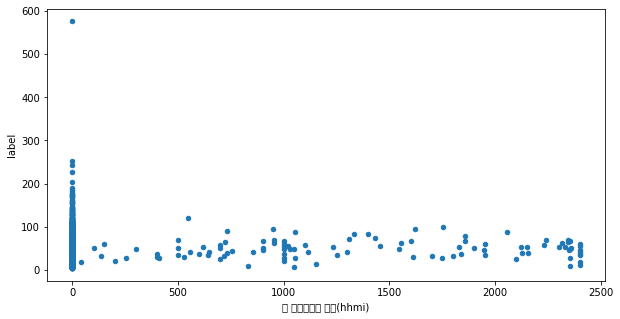

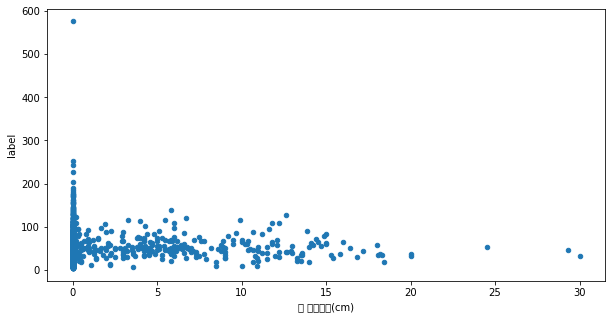

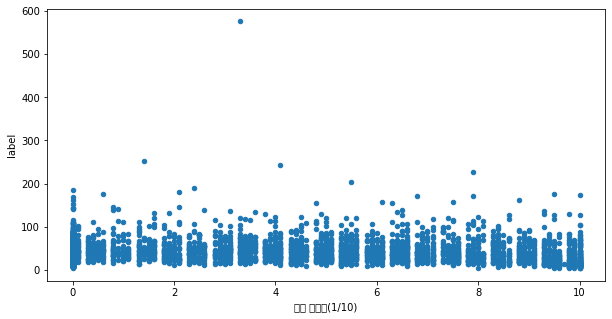

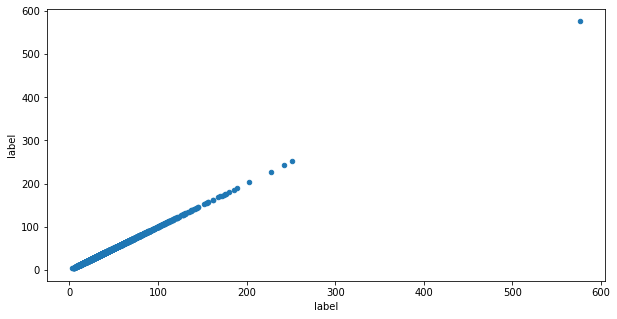

In [26]:
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
for name in column_name:
    input_data.plot(kind = "scatter",x = name, y = "label",figsize = (10,5))

비가 오거나 강우가 있는 경우에 비교적 미세먼지 농도가 낮은 것을 볼 수 있다. 따라서 중앙 값을 기준으로 0과 1로 구분한다.

또한 그래프 내에서 불필요하게 튀는 값을 관찰 가능 -> 제거

In [27]:
input_data = input_data[input_data["label"] != input_data["label"].max() ]

In [28]:
input_data.columns

Index(['평균기온(°C)', '최저기온 시각(hhmi)', '최고기온 시각(hhmi)', '강수 계속시간(hr)',
       '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속 풍향(16방위)',
       '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '평균 풍속(m/s)',
       '최다풍향(16방위)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)',
       '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '평균 전운량(1/10)', 'label'],
      dtype='object')

In [29]:
rain = ['10분 최다 강수량(mm)', '일강수량(mm)','일 최심신적설(cm)', '일 최심적설(cm)']

In [30]:
input_data["10분 최다 강수량(mm)"].mean()

0.47975194692817996

In [31]:
for r in rain:
    print(r)
    print(input_data[input_data[r]==0])
    input_data[input_data[r]==0][r] = 0
    input_data[input_data[r]>0][r] = 1

10분 최다 강수량(mm)
      평균기온(°C)  최저기온 시각(hhmi)  최고기온 시각(hhmi)  강수 계속시간(hr)  10분 최다 강수량(mm)  \
0        -10.3            811           1543         1.67             0.0   
1         -6.1           2333           1505        13.33             0.0   
2        -10.5            652           1510         0.00             0.0   
3         -6.9            459           1633         9.92             0.0   
4        -10.2           2334              2         0.00             0.0   
...        ...            ...            ...          ...             ...   
3460      22.0            453           1546         0.00             0.0   
3462      25.3            532           1705         0.00             0.0   
3463      24.5            527           1542         0.00             0.0   
3464      26.9            534           1510         0.00             0.0   
3467      24.6            520           1604         0.00             0.0   

      10분 최다강수량 시각(hhmi)  일강수량(mm)  최대 순간 풍속 풍향(16방위)  최대 순간

c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
input_data[input_data['최다풍향(16방위)'] == np.nan] = input_data["최다풍향(16방위)"].median()
input_data[input_data['최소 상대습도(%)'] == np.nan] = input_data["최소 상대습도(%)"].median()
input_data[input_data['최소 상대습도 시각(hhmi)'] == np.nan] = input_data["최소 상대습도 시각(hhmi)"].median()
input_data = input_data.dropna(axis = 0)

c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python\venv\tensorflow\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

리니어 모델 생성

In [33]:
x_data = input_data.iloc[:,:-1]
y_data = input_data.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 42)

In [35]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(linear.predict(x_test),y_test)))

22.091654816746207


In [37]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)
print(np.sqrt(mean_squared_error(tree.predict(x_test),y_test)))

27.00837057669233


In [38]:
for name, importance in zip(input_data.columns[:-1],tree.feature_importances_):
    print(name , " : ", importance)

평균기온(°C)  :  0.23253036135822888
최저기온 시각(hhmi)  :  0.025098537303310058
최고기온 시각(hhmi)  :  0.02928146127789623
강수 계속시간(hr)  :  0.017015618561655604
10분 최다 강수량(mm)  :  0.006051421732030203
10분 최다강수량 시각(hhmi)  :  0.0011573053853917218
일강수량(mm)  :  0.03625320824423042
최대 순간 풍속 풍향(16방위)  :  0.025611080672734914
최대 순간풍속 시각(hhmi)  :  0.04706984078524557
최대 풍속(m/s)  :  0.056635123079123294
최대 풍속 풍향(16방위)  :  0.020611638652095414
평균 풍속(m/s)  :  0.05371834518328842
최다풍향(16방위)  :  0.015572650354706225
최소 상대습도(%)  :  0.05788026035197074
최소 상대습도 시각(hhmi)  :  0.0311481312080067
평균 상대습도(%)  :  0.043239084616781685
최고 해면기압 시각(hhmi)  :  0.028650933788446395
최저 해면기압 시각(hhmi)  :  0.0401527930416428
평균 해면기압(hPa)  :  0.03303564482340312
가조시간(hr)  :  0.07157645464825914
합계 일조시간(hr)  :  0.02530048881530177
1시간 최다일사 시각(hhmi)  :  0.014072300519347665
합계 일사량(MJ/m2)  :  0.05046277968064094
일 최심신적설(cm)  :  0.0015376886277983473
일 최심신적설 시각(hhmi)  :  0.0015976573769606482
일 최심적설(cm)  :  0.0016873934594340235
평균 전운량

In [42]:
sort_importances = sorted(tree.feature_importances_)
importances = list(tree.feature_importances_)

In [44]:
columns_name = input_data.columns[:-1]
important_top_15 = []
for important in sort_importances:
    i = importances.index(important)
    important_top_15.append(columns_name[i])
    print(columns_name[i],' : ',importances[i])
    

10분 최다강수량 시각(hhmi)  :  0.0011573053853917218
일 최심신적설(cm)  :  0.0015376886277983473
일 최심신적설 시각(hhmi)  :  0.0015976573769606482
일 최심적설(cm)  :  0.0016873934594340235
10분 최다 강수량(mm)  :  0.006051421732030203
1시간 최다일사 시각(hhmi)  :  0.014072300519347665
최다풍향(16방위)  :  0.015572650354706225
강수 계속시간(hr)  :  0.017015618561655604
최대 풍속 풍향(16방위)  :  0.020611638652095414
최저기온 시각(hhmi)  :  0.025098537303310058
합계 일조시간(hr)  :  0.02530048881530177
최대 순간 풍속 풍향(16방위)  :  0.025611080672734914
최고 해면기압 시각(hhmi)  :  0.028650933788446395
최고기온 시각(hhmi)  :  0.02928146127789623
최소 상대습도 시각(hhmi)  :  0.0311481312080067
평균 해면기압(hPa)  :  0.03303564482340312
평균 전운량(1/10)  :  0.03305179645206917
일강수량(mm)  :  0.03625320824423042
최저 해면기압 시각(hhmi)  :  0.0401527930416428
평균 상대습도(%)  :  0.043239084616781685
최대 순간풍속 시각(hhmi)  :  0.04706984078524557
합계 일사량(MJ/m2)  :  0.05046277968064094
평균 풍속(m/s)  :  0.05371834518328842
최대 풍속(m/s)  :  0.056635123079123294
최소 상대습도(%)  :  0.05788026035197074
가조시간(hr)  :  0.07157645464825914
평균

In [46]:
important_top_15 = important_top_15[-15:]

In [47]:
print(important_top_15)

['최고 해면기압 시각(hhmi)', '최고기온 시각(hhmi)', '최소 상대습도 시각(hhmi)', '평균 해면기압(hPa)', '평균 전운량(1/10)', '일강수량(mm)', '최저 해면기압 시각(hhmi)', '평균 상대습도(%)', '최대 순간풍속 시각(hhmi)', '합계 일사량(MJ/m2)', '평균 풍속(m/s)', '최대 풍속(m/s)', '최소 상대습도(%)', '가조시간(hr)', '평균기온(°C)']


In [48]:
input_data = input_data.loc[:,important_top_15]

In [51]:
x_data = input_data.iloc[:,:-1]
y_data = input_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)

c:\python\venv\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
print(np.sqrt(mean_squared_error(random_forest.predict(x_test),y_test)))

4.079937100378411


In [72]:
from keras.layers import Dense,Dropout,Input
from keras.models import Model
input_ = Input((14,))
dense_1 = Dropout(0.3)(Dense(50, activation='relu')(input_))
dense_2 = Dropout(0.2)(Dense(50,activation = 'relu')(dense_1))
output = Dense(1,activation='linear')(dense_2)
model = Model([input_],output)
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [73]:
model.fit(x_data,y_data,epochs = 204,validation_split=0.2)

Train on 2440 samples, validate on 611 samples
Epoch 1/204
2440/2440 [==============================] - 0s 68us/step - loss: 89492.9514 - val_loss: 1205.2789
Epoch 2/204
2440/2440 [==============================] - 0s 27us/step - loss: 21106.9779 - val_loss: 1250.3659
Epoch 3/204
2440/2440 [==============================] - 0s 27us/step - loss: 8525.5797 - val_loss: 484.2917
Epoch 4/204
2440/2440 [==============================] - 0s 27us/step - loss: 5095.4692 - val_loss: 355.8711
Epoch 5/204
2440/2440 [==============================] - 0s 26us/step - loss: 3229.5498 - val_loss: 283.6559
Epoch 6/204
2440/2440 [==============================] - 0s 28us/step - loss: 2136.7933 - val_loss: 206.6812
Epoch 7/204
2440/2440 [==============================] - 0s 27us/step - loss: 1496.9472 - val_loss: 181.9483
Epoch 8/204
2440/2440 [==============================] - 0s 27us/step - loss: 1164.0801 - val_loss: 160.2570
Epoch 9/204
2440/2440 [==============================] - 0s 27us/step - loss:

In [78]:
print(np.sqrt(model.evaluate(x_test,y_test)))

611/611 [==============================] - 0s 11us/step
6.670264137201845
